In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#tc = np.load('../data/test_chunks/test_chunks_1.npy')

In [19]:
import pickle

sang_preds = pickle.load( open( "../other/nn_603_stack.pickle", "rb" ) )

In [31]:
sang_oof = sang_preds[0]
sang_test = sang_preds[1]
sang_df_oof = pd.Series(sang_oof).to_frame(name='sang_lstm_603').to_hdf('../level_1_preds/sang_lstm_603_oof.h5', key='w')
sang_df_test = pd.Series(sang_test).to_frame(name='sang_lstm_603').to_hdf('../level_1_preds/sang_lstm_603_test.h5', key='w')

In [40]:
from sklearn.metrics import precision_score, recall_score, matthews_corrcoef

y_tgt = np.load('../other/y_tgt.npy')
old_tgts = np.reshape(y_tgt, (int(y_tgt.size/3),-1))
old_tgts[np.sum(old_tgts, axis=1)>=1] = 1
old_y_tgt = np.copy(y_tgt)
y_tgt = np.reshape(old_tgts, (-1,))

sang_oof_round = np.round(sang_oof).astype(int)
precision_score(y_tgt, sang_oof_round), recall_score(y_tgt, sang_oof_round), matthews_corrcoef(y_tgt, sang_oof_round)

(0.822265625, 0.7233676975945017, 0.7560514140943269)

In [74]:
import glob
paths = glob.glob('../submissions/lgbm_v80*')

In [75]:
subs=[]
for p in paths:
    subs.append(pd.read_csv(p)['target'].values[:,None])
concated_targets = np.hstack(subs)

In [76]:
np.sum(concated_targets, axis=0)

array([1025,  965,  927,  998, 1014, 1006, 1085,  920,  910,  934,  940,
        967, 1028,  955,  997, 1011, 1040, 1048,  930,  981,  969,  967,
        998,  924, 1036,  896,  980,  956,  981,  904,  995,  985,  975,
       1062,  922,  948,  886,  932, 1007, 1052, 1041, 1017,  993, 1003,
        938, 1014, 1078,  925,  978, 1005,  933,  973,  954, 1030,  937,
        911,  994,  975, 1018, 1050,  970,  986, 1037,  945,  995,  966,
        985,  909, 1031,  915,  964, 1009,  941,  897, 1008,  901,  901,
        937, 1077,  980,  968,  904, 1085,  903,  962,  955,  984, 1026,
       1073, 1046, 1026, 1041,  940,  920,  941, 1041,  950, 1036,  950,
       1011])

In [77]:
blended = np.round(np.mean(concated_targets, axis=1)).astype(int)
blended.shape, np.sum(blended)
final_sub = pd.read_csv(paths[0])
final_sub['target'] = blended
final_sub.to_csv('../submissions/blend2_v80_lgbm.csv', index=False)

In [78]:
final_sub.sum()

signal_id    383962560
target             982
dtype: int64

In [7]:
aug_train = pd.read_hdf('../features/pp_train_db20_base-feats_v21_aug_0.25.h5')
aug_tgt = np.load('../data/y_tgt_aug_0.25.npy')

In [2]:
raw_feats = np.load('../features_cnn/pp_train_db20_raw-feats_v2.npy')

In [6]:
v21 = pd.read_hdf('../features/pp_train_db20_base-feats_v21.h5')
v61 = pd.read_hdf('../features/pp_train_db20_base-feats_v61.h5')

In [33]:
cols = list(v21.columns)

In [31]:
cols

Index(['num_peaks_rr0.25_md30_rl0.10', 'mean_height_rr0.25_md30_rl0.10',
       'std_height_rr0.25_md30_rl0.10', 'std_width_rr0.25_md30_rl0.10',
       'percen_width_10_rr0.25_md30_rl0.10',
       'percen_width_90_rr0.25_md30_rl0.10'],
      dtype='object')

In [7]:
v21.describe()

,num_peaks_rr0.25_md30_rl0.10,mean_height_rr0.25_md30_rl0.10,std_height_rr0.25_md30_rl0.10,std_width_rr0.25_md30_rl0.10,percen_width_10_rr0.25_md30_rl0.10,percen_width_90_rr0.25_md30_rl0.10
count,8712.000000,8141.000000,8141.000000,8141.000000,8141.000000,8141.000000
mean,113.543159,0.139162,4.011674,28.069526,9.106313,70.843847
std,191.409626,0.812962,1.674391,47.953667,28.047892,128.330568
min,0.000000,-6.500000,0.000000,0.000000,0.119875,0.157143
25%,21.000000,-0.166667,3.043390,0.206507,0.200000,0.600000
50%,63.000000,0.122093,4.138245,0.396707,0.219556,1.047111
75%,127.000000,0.500000,5.122499,55.865926,0.300000,6.520000
max,1914.000000,5.000000,12.529964,173.552253,177.480000,459.720000


In [8]:
v61.describe()

,num_peaks_rr0.25_md30_rl0.10,mean_height_rr0.25_md30_rl0.10,std_height_rr0.25_md30_rl0.10,std_width_rr0.25_md30_rl0.10,percen_width_10_rr0.25_md30_rl0.10,percen_width_90_rr0.25_md30_rl0.10
count,8712.000000,8710.000000,8710.000000,8.710000e+03,8710.000000,8710.000000
mean,7388.258494,0.076514,2.604415,1.743782e+00,0.594135,3.392018
std,6562.995958,0.237380,0.513074,1.995678e+00,0.174343,1.781047
min,0.000000,-2.000000,0.000000,4.365575e-11,0.197724,0.600000
25%,2027.000000,-0.021649,2.209179,6.997624e-01,0.400000,2.000000
50%,5589.500000,0.035621,2.443468,1.053231e+00,0.600000,2.800000
75%,10345.250000,0.116393,2.950378,2.143027e+00,0.800000,4.200000
max,36763.000000,2.000000,6.101953,6.634524e+01,1.200000,16.200000


In [36]:
v21.head()

,num_peaks_rr0.25_md30_rl0.10,mean_height_rr0.25_md30_rl0.10,std_height_rr0.25_md30_rl0.10,std_width_rr0.25_md30_rl0.10,percen_width_10_rr0.25_md30_rl0.10,percen_width_90_rr0.25_md30_rl0.10
0,119.0,-0.243697,4.342416,-1.546417,-1.545681,-0.510826
1,21.0,-0.619048,2.645323,-0.479573,-0.916291,0.459532
2,58.0,0.465517,4.005236,-1.675439,-1.491655,-0.584044
3,206.0,-0.038835,4.486057,-1.544585,-1.609438,-0.693147
4,129.0,0.542636,4.322302,-0.839055,-1.645806,0.220473


/home/lanfear/anaconda3/envs/tf_intro/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


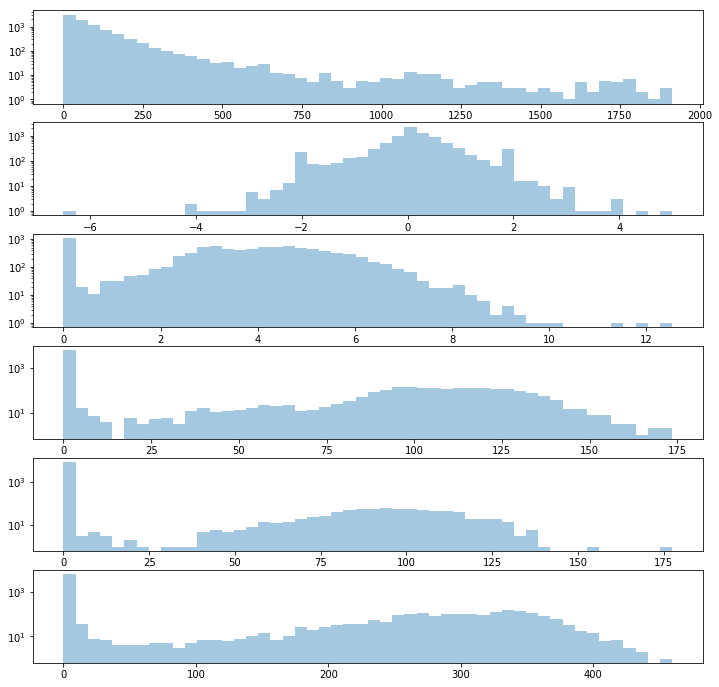

In [23]:
fig, axs = plt.subplots(nrows=6, sharex=False, figsize=(12,12))
for i in range(6):
    sns.distplot(feats[:,i], kde=False, ax=axs[i])
    axs[i].set_yscale('log')

In [3]:
pp_db20_train = np.load('../preprocessed_data/pp_train_db20/pp_train_db20_0.npy')

In [38]:
pp_db20_train.shape

(88, 800000)

NameError: name 'pp_db20_train' is not defined

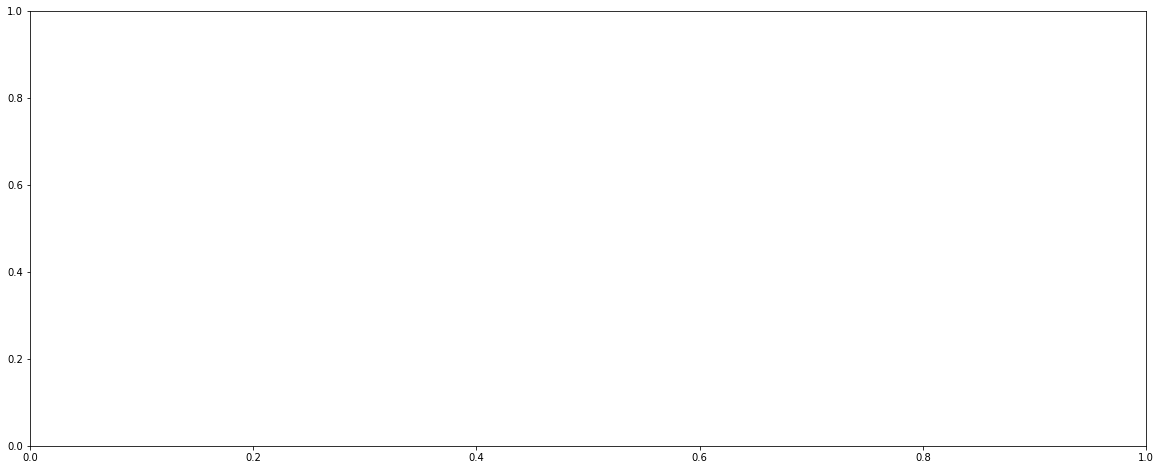

In [11]:
samp_freq = 10
fig, ax = plt.subplots(figsize=(20,8))
for line in pp_db20_train[:10,:]:
    t = np.arange(0, pp_db20_train.shape[1], samp_freq)
    sns.lineplot(t, line[::samp_freq], alpha=0.1, linewidth=2, ax=ax)

In [15]:
fold = np.load('../other/eval_fold_2.npy')

In [17]:
fold.shape

(1742,)

In [8]:
batch = np.load('../preprocessed_data/pp_train_db20_l0h0a/pp_train_db20_l0h0a_0.npy')

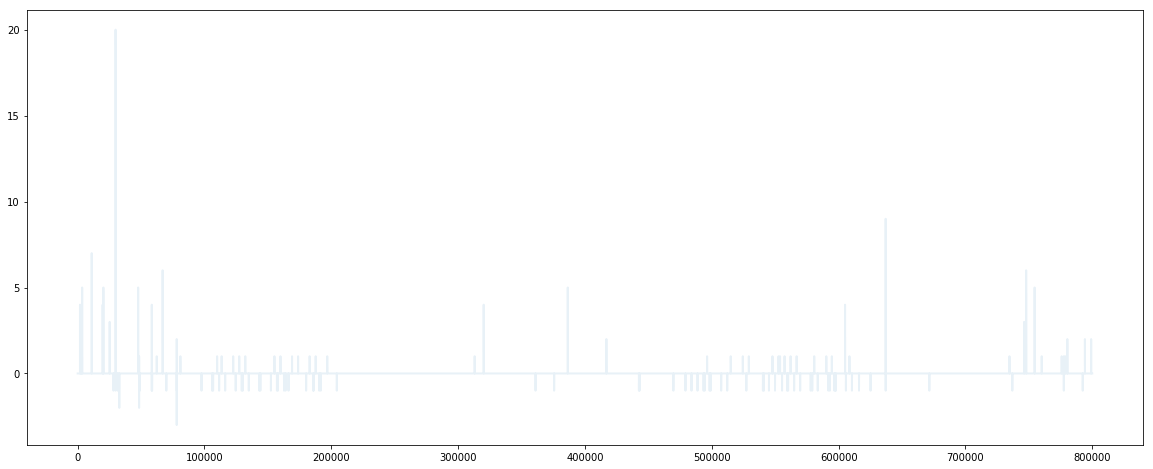

In [13]:
samp_freq = 10
fig, ax = plt.subplots(figsize=(20,8))
for line in batch[:1]:
    t = np.arange(0, batch.shape[1], samp_freq)
    sns.lineplot(t, line[::samp_freq], alpha=0.1, linewidth=2, ax=ax)

In [15]:
np.sum(np.isnan(line))

0

In [16]:
np.save('../features_cnn/pp_train_db20_raw-feats_v2.npy', raw_feats.astype(np.float16))

In [9]:
cnn_feats = np.load('../features_cnn/pp_test_db20_cnn-feats_v1.npy')

In [12]:
cnn_feats.shape, cnn_feats.dtype, cnn_feats.size

((20337, 11, 1000), dtype('float64'), 223707000)

In [13]:
np.sum(np.isnan(cnn_feats))

195180550

In [11]:
# Load metadata as well
meta_train, meta_test = pd.read_csv('../data/metadata_train.csv'), pd.read_csv('../data/metadata_test.csv')

# Load oof preds
oof_preds = pd.read_hdf('../level_1_preds/lgbm_v23_0.6609_pp_oof.h5').values[:, 0]

# Get target
target = meta_train['target'].values

In [12]:
pd.Series(target).value_counts()

0    8187
1     525
dtype: int64

In [5]:
train_feats = pd.read_hdf('../features/pp_train_db20_base-feats_v1_jan14.h5')

In [5]:
pd.read_csv('../data/metadata_train.csv')['target'].values[704:713]

array([0, 1, 1, 1, 1, 1, 1, 0, 0])

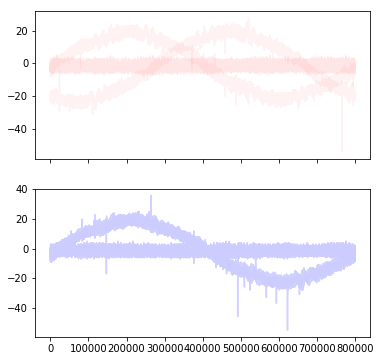

In [21]:
import matplotlib.pyplot as plt

# Load demo raw signals
import glob
nsigs=145
demo_raw = np.vstack([np.load(p) for p in sorted(glob.glob('../data/demo_chunks/*'))]).astype(np.int8)[nsigs:nsigs+4,:]
demo_pp = np.vstack([np.load(p) for p in sorted(glob.glob('../preprocessed_data/pp_demo_db20/*'))]).astype(np.int8)[nsigs:nsigs+4,:]

f, axs = plt.subplots(2, 1, sharex=True, sharey=False, figsize=(3*2, 3*2))

subfreq = 20
t = np.arange(0, demo_pp.shape[1], subfreq)
for i,(rs, pps) in enumerate(zip(demo_raw, demo_pp)):
    i *= 2                         
    axs[0].plot(t, rs[::subfreq], alpha=0.10, c=(1,0.5,0.5))
    axs[1].plot(t, pps[::subfreq], alpha=0.90, c=(0.8,0.8,1.0))          

In [52]:
pd.Series(demo_raw[114,:]).describe()

count    800000.000000
mean         -1.012639
std          13.621458
min         -33.000000
25%         -14.000000
50%          -1.000000
75%          12.000000
max          25.000000
dtype: float64

In [2]:
tf = np.load('../features_cnn/pp_train_db20_raw-feats_v2.npy')

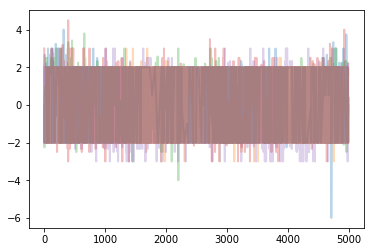

In [6]:
for line in np.squeeze(tf[:5,1,:]):
    t = np.arange(0, tf.shape[2], 1)
    sns.lineplot(t, line, alpha=0.3, linewidth=2)

In [2]:
import pandas as pd
base_feats = pd.read_hdf('../features/pp_train_db20_base-feats_v7_jan21.h5')

In [3]:
base_feats.head()

,num_peaks,mean_height,max_height,min_height,mean_width,max_width,min_width,std_width
0,23.0,0.478261,6.0,-4.0,830.704705,10740.625000,1.000000,2325.139040
1,9.0,0.444444,1.0,-2.0,1736.555556,15609.000000,2.000000,4904.649792
2,41.0,0.439024,5.0,-2.0,1079.960128,6657.916667,1.000000,1788.541750
3,60.0,-0.216667,6.0,-14.0,1626.497022,33856.875000,0.866667,4883.489134
4,41.0,0.073171,5.0,-7.0,1572.907404,41682.000000,0.625000,6555.521185


In [4]:
base_feats_2 = pd.read_hdf('../features/pp_train_db20_base-feats_v9_jan22_4band.h5')

In [6]:
base_feats_2.iloc[:5,0:20]

,num_peaks_0,mean_height_0,std_height_0,mean_width_0,max_width_0,std_width_0,num_peaks_1,mean_height_1,std_height_1,mean_width_1,max_width_1,std_width_1,num_peaks_2,mean_height_2,std_height_2,mean_width_2,max_width_2,std_width_2,num_peaks_3,mean_height_3
0,1.0,1.000000,0.000000,10740.625000,10740.625,0.000000,2.0,1.0,0.000000,2.000000,2.000000,0.000000,18.0,0.333333,2.403701,464.253388,3311.750000,1079.486935,2.0,1.000000
1,0.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.000000,3.000000,3.000000,0.000000,2.0,1.000000,0.000000,7805.500000,15609.000000,7803.500000,6.0,0.166667
2,2.0,0.000000,1.000000,1.500000,2.000,0.500000,2.0,-0.5,1.500000,2.166667,2.333333,0.166667,34.0,0.558824,2.031968,1301.926592,6657.916667,1889.152879,3.0,0.000000
3,47.0,-0.468085,3.009567,825.758610,11753.000,1960.842958,4.0,1.0,0.000000,13300.502083,33856.875000,12757.608255,6.0,0.333333,1.490712,784.126389,4144.600000,1516.260135,3.0,1.000000
4,32.0,0.281250,1.824047,522.897359,7141.000,1586.859755,8.0,-1.0,2.645751,5969.227679,41682.000000,13642.863645,1.0,2.000000,0.000000,2.000000,2.000000,0.000000,0.0,NaN


In [34]:
# load subs
sub_1 = pd.read_csv('../submissions/lgbm_v13_single_base_0.6139.csv')
sub_2 = pd.read_csv('../submissions/lgbm_stack_v1_0.6139.csv').values

In [7]:
np.sum(sub_1[:,1] - sub_2[:,1])

0

In [10]:
sub_1['id'] = np.repeat(np.arange(0, int(sub_1.shape[0]/3)), 3)

In [13]:
sub_1.groupby('id')['target'].sum().value_counts()

0    6385
1     188
2     132
3      74
Name: target, dtype: int64

In [36]:
raw_target = sub_1.values[:,1]
np.sum(raw_target)

674

In [37]:
num_lines = int(sub_1.shape[0]/3)
for line in range(num_lines):
    first_phase = line * 3
    if np.sum(raw_target[first_phase:first_phase+3]) > 1:
        raw_target[first_phase:first_phase+3] = 1

In [38]:
np.sum(raw_target)

806

In [40]:
# lets see
sub_1['target'] = raw_target

In [41]:
sub_1.to_csv('../submissions/postproc_betatest.csv', index=False)

In [63]:
a = pd.read_hdf('../level_1_preds/lgbm_v13r_v2_0.5567_test.h5')

In [3]:
sub_nopp = pd.read_csv('../submissions/lgbm_v23_0.6185.csv')
sub_pp = pd.read_csv('../submissions/lgbm_v23_0.6630_pp.csv')

In [9]:
nopp = np.reshape(sub_nopp['target'].values, newshape=(int(sub_nopp.shape[0]/3),-1))
pp = np.reshape(sub_pp['target'].values, newshape=(int(sub_pp.shape[0]/3),-1))

In [13]:
pd.Series(np.sum(nopp, axis=1)).value_counts() / pd.Series(np.sum(nopp, axis=1)).value_counts().sum()

0    0.923883
1    0.032011
2    0.027585
3    0.016522
dtype: float64

In [14]:
pd.Series(np.sum(pp, axis=1)).value_counts() / pd.Series(np.sum(pp, axis=1)).value_counts().sum()

0    0.923883
3    0.044107
1    0.032011
dtype: float64

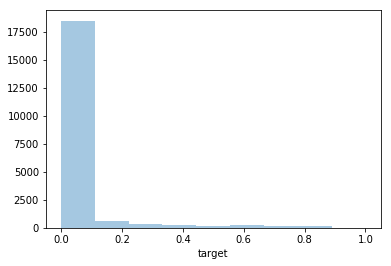

In [70]:
sns.distplot(nt['target'], kde=False, bins=np.linspace(0,1,10))

In [16]:
v16_feats = pd.read_hdf('../features/pp_train_db20_base-feats_v16.h5')

In [74]:
v16_feats.describe()

,num_peaks_rr0.25_md30_rl0.10,mean_height_rr0.25_md30_rl0.10,std_height_rr0.25_md30_rl0.10,mean_width_rr0.25_md30_rl0.10,std_width_rr0.25_md30_rl0.10,percen_width_10_rr0.25_md30_rl0.10,percen_width_90_rr0.25_md30_rl0.10
count,8712.000000,8141.000000,8141.000000,8141.000000,8141.000000,8141.000000,8141.000000
mean,113.543159,0.139162,4.011674,33.827199,28.069526,9.106313,70.843847
std,191.409626,0.812962,1.674391,69.065036,47.953667,28.047892,128.330568
min,0.000000,-6.500000,0.000000,0.157143,0.000000,0.119875,0.157143
25%,21.000000,-0.166667,3.043390,0.391555,0.206507,0.200000,0.600000
50%,63.000000,0.122093,4.138245,0.582559,0.396707,0.219556,1.047111
75%,127.000000,0.500000,5.122499,14.523592,55.865926,0.300000,6.520000
max,1914.000000,5.000000,12.529964,273.200000,173.552253,177.480000,459.720000


In [75]:
v16_feats.shape

(8712, 7)

In [76]:
v16_feats.head()

,num_peaks_rr0.25_md30_rl0.10,mean_height_rr0.25_md30_rl0.10,std_height_rr0.25_md30_rl0.10,mean_width_rr0.25_md30_rl0.10,std_width_rr0.25_md30_rl0.10,percen_width_10_rr0.25_md30_rl0.10,percen_width_90_rr0.25_md30_rl0.10
0,119.0,-0.243697,4.342416,0.383346,0.213010,0.213167,0.600000
1,21.0,-0.619048,2.645323,0.900794,0.619048,0.400000,1.583333
2,58.0,0.465517,4.005236,0.383624,0.187226,0.225000,0.557639
3,206.0,-0.038835,4.486057,0.335492,0.213400,0.200000,0.500000
4,129.0,0.542636,4.322302,0.523455,0.432119,0.192857,1.246667


In [21]:
os = v16_feats.values[:12,:3]

In [22]:
os

array([[ 1.19000000e+02, -2.43697479e-01,  4.34241614e+00],
       [ 2.10000000e+01, -6.19047619e-01,  2.64532275e+00],
       [ 5.80000000e+01,  4.65517241e-01,  4.00523587e+00],
       [ 2.06000000e+02, -3.88349515e-02,  4.48605678e+00],
       [ 1.29000000e+02,  5.42635659e-01,  4.32230155e+00],
       [ 1.74000000e+02,  5.40229885e-01,  4.48574908e+00],
       [ 5.10000000e+01, -1.96078431e-01,  6.61554796e+00],
       [ 2.50000000e+01,  6.80000000e-01,  6.44806948e+00],
       [ 1.30000000e+01,  7.69230769e-02,  3.68910117e+00],
       [ 1.55000000e+02,  1.29032258e-01,  4.43986294e+00],
       [ 2.08000000e+02,  1.48076923e+00,  4.97779834e+00],
       [ 1.60000000e+02, -1.43750000e-01,  5.28541256e+00]])

In [25]:
np.reshape(np.reshape(os, (int(os.shape[0]/3), -1)), (-1,))

array([ 1.19000000e+02, -2.43697479e-01,  4.34241614e+00,  2.10000000e+01,
       -6.19047619e-01,  2.64532275e+00,  5.80000000e+01,  4.65517241e-01,
        4.00523587e+00,  2.06000000e+02, -3.88349515e-02,  4.48605678e+00,
        1.29000000e+02,  5.42635659e-01,  4.32230155e+00,  1.74000000e+02,
        5.40229885e-01,  4.48574908e+00,  5.10000000e+01, -1.96078431e-01,
        6.61554796e+00,  2.50000000e+01,  6.80000000e-01,  6.44806948e+00,
        1.30000000e+01,  7.69230769e-02,  3.68910117e+00,  1.55000000e+02,
        1.29032258e-01,  4.43986294e+00,  2.08000000e+02,  1.48076923e+00,
        4.97779834e+00,  1.60000000e+02, -1.43750000e-01,  5.28541256e+00])

In [88]:
os.shape[0].astype(float)

AttributeError: 'int' object has no attribute 'astype'

In [95]:
tgt = os[:12,0]

In [96]:
tgt

array([119.,  21.,  58., 206., 129., 174.,  51.,  25.,  13., 155., 208.,
       160.])

In [98]:
np.reshape(tgt, newshape=(4,-1))

array([[119.,  21.,  58.],
       [206., 129., 174.],
       [ 51.,  25.,  13.],
       [155., 208., 160.]])

In [16]:
a=np.random.rand(3,1)

In [17]:
b=np.ones((3,5))

In [18]:
np.median(b, axis=1)[:,None].shape

(3, 1)

In [23]:
a

array([[0.00335596],
       [0.03535809],
       [0.57121979]])

In [25]:
b /= a

In [26]:
b

array([[8.87903018e+04, 8.87903018e+04, 8.87903018e+04, 8.87903018e+04,
        8.87903018e+04],
       [7.99875405e+02, 7.99875405e+02, 7.99875405e+02, 7.99875405e+02,
        7.99875405e+02],
       [3.06473907e+00, 3.06473907e+00, 3.06473907e+00, 3.06473907e+00,
        3.06473907e+00]])

In [24]:
np.ptp(b, axis=1)

array([0., 0., 0.])

In [12]:
def max_streak(vec, gap):
    best_streak = 0
    curr_streak = 0
    diffs = vec[1:]-vec[:-1]
    for diff in diffs:
        if diff > gap:
            if curr_streak > best_streak:
                best_streak = curr_streak
            curr_streak = 0
        else:
            curr_streak += diff
    if curr_streak > best_streak:
                best_streak = curr_streak
    return best_streak

In [13]:
import numpy as np
vec = np.array([10,2000,3000,3400,3670,10000,10001,10002,10003,20000,50000,50010])
max_streak(vec, gap=2)

3